In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
bc = load_breast_cancer()
X = bc.data
y = bc.target

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier and train it on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Confusion Matrix:
[[ 49  14]
 [  0 108]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        63
           1       0.89      1.00      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171

Accuracy Score: 91.81%


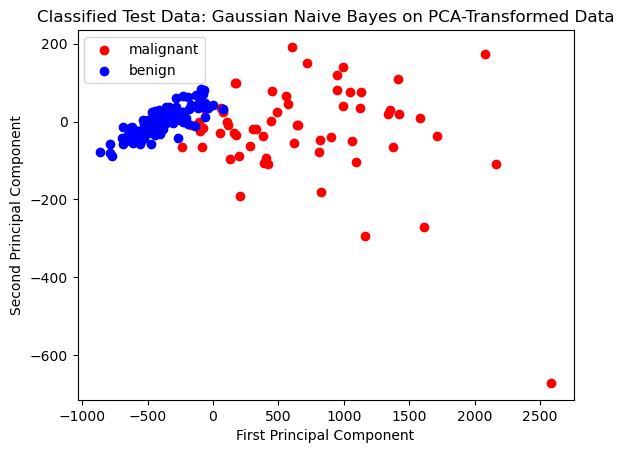

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
bc = load_breast_cancer()
X = bc.data
y = bc.target

# Perform PCA on the breast cancer dataset, keeping only the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier and train it on the PCA-transformed training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the PCA-transformed testing data
y_pred = gnb.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Scatter plot of the classified test data
colors = ['red', 'blue']
labels = bc.target_names

for i, color, label in zip(range(2), colors, labels):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], color=color, label=label)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("Classified Test Data: Gaussian Naive Bayes on PCA-Transformed Data")
plt.show()
